In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df=pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [29]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [53]:
df.shape

# Rows = 225745, Columns = 79  ( 0 to 78 => 79 ) 

(225745, 79)

In [63]:
set(list(df.dtypes))
# Dataset madhe kon konte different types present ahe te check karnya sathi hi command ahe
# So Dataset madhe integer, float and Object type cha data ahe 
# DATASET MADHE PRESENT ASELELE BOLTO A 

# {int64, float64,OBJECT} 

{dtype('int64'), dtype('float64'), dtype('O')}

In [73]:
# Hi Object type che sarva columns select karte
categorical_columns=[col for col in df.columns if df[col].dtype=="O"]
categorical_columns
# So we have only one object type column "Label"

[' Label']

In [10]:
## SO DATAFRAME SPLITTED INTO TWO GROUPS 
# 1. CATEGORICAL DATA = "label"
# 2. NUMERICAL DATA = other than label

## Categorical Data
df_Categorical=df[categorical_columns]
df_Categorical

,Label
0,BENIGN
1,BENIGN
2,BENIGN
3,BENIGN
4,BENIGN
...,...
225740,BENIGN
225741,BENIGN
225742,BENIGN
225743,BENIGN


In [11]:
# Numerical data
df_Numerical=df.copy()
df_Numerical.drop([" Label"],axis=1,inplace=True)
## cols = df.select_dtypes(include=['float64','int64']).columns

df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


( Label
 DDoS      128027
 BENIGN     97718
 Name: count, dtype: int64,
 <Axes: xlabel=' Label', ylabel='count'>)

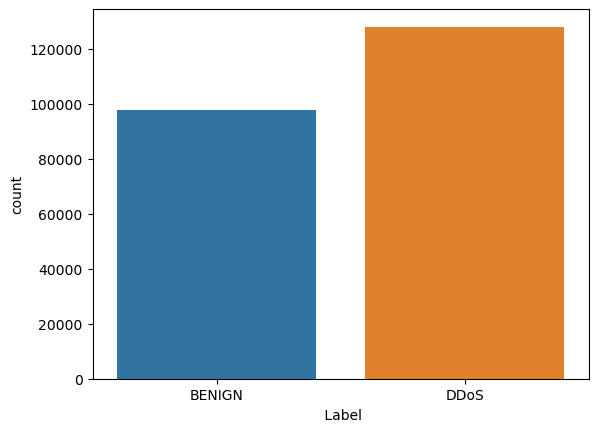

In [12]:
##  To check the Counts of each Class in the dependent Variable
df_Categorical[" Label"].value_counts(),sns.countplot(x=df_Categorical[' Label'])

# ithe label che counts check karto 
# BENGIN - ideal 
# DDoS   - Intrusion/ Attack 

In [14]:
## To check Unique values in the data 
for i in df_Numerical.columns:
    #if df[i].unique()<
    print(f" {i} Column has {df[i].nunique()} unique values and those are {df[i].unique()}\n\n")

  Destination Port Column has 23950 unique values and those are [54865 55054 55055 ... 39950 61301 61326]


  Flow Duration Column has 187752 unique values and those are [    3   109    52 ... 55637 53596 21000]


  Total Fwd Packets Column has 297 unique values and those are [   2    1    3   20   15    4    5    8   29    6   14   41   47   46
   45   27   23   26   51   50   48   52   49   21   42   43   44   78
   53   31   19   69   22   25   24   30   68   40   39   75   28   12
   17   18   13    7   11   38    9 1611   70   10  124   33   34   16
   54  225   56   32  220  103  390   97   58   72  111   85   71   73
   61   55   35  209  205  149  212  108   98   37  188  101   65   36
  114   91  246  100   62  102  105   79  106  122  277   76  126   82
   96  196   84  263   77   93   63   74   81   66  354  175   64  117
  107   92  457   67  142  135  116   60  143  112  120  155  214  201
  187  519  128  136  194  146  216  250  127  352  176  537  104   83
   99   59  1

In [81]:
for i in df_Numerical.columns:
    if df[i].isnull().sum()>0:
        print(i)
    

Flow Bytes/s


In [72]:
## We are having nan values in this column
df_Numerical["Flow Bytes/s"].isnull().sum()

4

In [74]:
## To check the dependent column data , when the data is nan
#nan_rows = df[df["Flow Bytes/s"].isnull()]
for index, row in df_Numerical.iterrows():
    if pd.isna(row["Flow Bytes/s"]):
        print(row["Flow Bytes/s"],df_Categorical[" Label"].iloc[index])

nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN


In [75]:
## Drop the nan values 
df_Numerical.dropna(inplace=True)

In [76]:
## To check this funtion all columns should be numerical data types like int,float  should not include "Object datatype"
np.all(np.isfinite(df_Numerical.values))

False

In [77]:
## To check total sum of the infinite values in the data
np.isinf(df_Numerical).values.sum()
## To check all values of dataframe are finite
#np.all(np.isfinite(df.values))
#np.all(np.isinf(df))


60

In [78]:
#infintie_column_list=[]
#count={}
#list1=df_Numerical.columns
#for index,row in df_Numerical.iterrows():
 #   for j in list1:
  #      if np.isfinite(row[j])==False:
 #           infintie_column_list.append(j)
  #          count[j]=
    #        print(f" This column '{j}' has infinity value in {index} ,this looks like {row[j]}\n")#

In [79]:
#infinite_column_list = []

# Iterate through the rows of the DataFrame
#for index, row in df_Numerical.iterrows():
 #   for column in df_Numerical.columns:
#        if not np.isfinite(row[column]):
            # Add the column name to the list of columns with infinite values
  #          infinite_column_list.append(column)
            #print(f"Row {index}: Column '{column}' has infinite value: {row[column]}")

# Remove duplicates from the list of columns with infinite values
#infinite_column_list = list(set(infinite_column_list))

# Print the list of columns with infinite values
#print("\nColumns with infinite values:")
#print(infinite_column_list)

In [80]:
import numpy as np

infinite_column_count = {}  # Dictionary to store counts
infinite_Value_index_num = []  # List to store index numbers

# Iterate through the columns
for column in df_Numerical.columns:
    count = 0  # Initialize count for the current column
    for index, value in enumerate(df_Numerical[column]):
        if not np.isfinite(value): 
            count += 1  # Increment count for non-numeric (infinite) values
            infinite_Value_index_num.append(index)  # Append the index number
    if count > 0:
        infinite_column_count[column] = count  # Store count in the dictionary

# Convert the list of index numbers to a set to remove duplicates
infinite_Value_index_num = set(infinite_Value_index_num)

# Print the dictionary and the set of index numbers
print("Counts of non-numeric (infinite) values in each column:")
print(f"{infinite_column_count}\n")

print("Index numbers of non-numeric (infinite) values:")
print(infinite_Value_index_num)

Counts of non-numeric (infinite) values in each column:
{'Flow Bytes/s': 30, ' Flow Packets/s': 30}

Index numbers of non-numeric (infinite) values:
{13312, 201234, 13715, 88088, 200346, 214428, 174376, 216492, 3375, 33327, 214449, 174391, 148281, 65, 203976, 18250, 204235, 194125, 8404, 61526, 213590, 204637, 1890, 189922, 208996, 1767, 130665, 215022, 8056, 55548}


In [81]:
Benign=0
bot=0
for i in infinite_Value_index_num:
    if df_Categorical[" Label"].iloc[i]=="BENIGN":
        Benign+=1
    else:
        bot+=1
        
print(f" Benign counts are {Benign}\n\n")
print(f" bot counts are {bot}")


 Benign counts are 28


 bot counts are 2


In [82]:
## Replace the infinite values with nan values and then delete each row 
df_Numerical.replace([np.inf, -np.inf], np.nan, inplace=True)
df_Numerical.dropna(inplace=True)

In [83]:
## To confirm once again is there any nan or infinite values
## To check total sum of the infinite values in the data
#np.isinf(df_Numerical).values.sum(),np.any(np.isnan(df_Numerical))
np.all(np.isinf(df_Numerical)),np.any(np.isnan(df_Numerical))

(False, False)

In [84]:
# To check is there any nan values 
#np.any(np.isnan(df)),  np.all(np.isfinite(df))
#np.isfinite(df[' Destination Port'].iloc[1])

In [85]:
df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [86]:
df_Numerical.shape,df_Categorical.shape

((225711, 78), (225745, 1))

In [87]:
# Create a list of index numbers from df_Numerical
index_numbers_to_fetch = df_Numerical.index.tolist()

# Fetch the corresponding rows from df_Categorical
df_Categorical = df_Categorical.loc[index_numbers_to_fetch]

# df_Categorical_subset now contains the rows from df_Categorical that correspond to the index numbers in df_Numerical

In [88]:
df_Categorical.shape

(225711, 1)

In [89]:
## Dependent data 
y=pd.get_dummies(data=df_Categorical[" Label"], drop_first=True)
y


,DDoS
0,False
1,False
2,False
3,False
4,False
...,...
225740,False
225741,False
225742,False
225743,False


In [90]:
# Independent data
df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [91]:
df_Numerical_Scaled_data=pd.DataFrame()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_Numerical_Scaled_data[df_Numerical.columns] = scaler.fit_transform(df_Numerical[df_Numerical.columns])

In [92]:
df_Numerical_Scaled_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.837225,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,...,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.840109,9.166671e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.840124,4.416669e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.705548,2.916668e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.837194,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,...,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225706,0.936550,5.166669e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225707,0.936611,6.083336e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225708,0.936565,6.333337e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225709,0.935772,4.083335e-07,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,...,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
## Dependent data
X=df_Numerical_Scaled_data

In [94]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
## The size of Train and test data
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((151226, 78), (151226, 1), (74485, 78), (74485, 1))

In [102]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
## Train the model with training data
logistic_model.fit(X_train, y_train)

C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
## Get prediction for testing data(X_Test)
y_pred = logistic_model.predict(X_test)

In [104]:
from sklearn.metrics import *
## Compare both y_pred and y_test
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)
print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy is 98.89239444183393
Confusion Matrix
[[31500   802]
 [   23 42160]]


In [105]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import *
from sklearn.tree import *
 ## Cross Validation score by using K-fold Cross validation
#scores = cross_val_score(v, X_train, y_train, cv=10)
#classification = metrics.classification_report(y_train, v.predict(X_train))

In [106]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

In [107]:
# Function to split data into training and testing sets
def split_data(X, y, test_size=0.2, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Function to train a classification model
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)

# Function to evaluate a classification model
def evaluate_model(model, X, y, dataset_name):
    accuracy = accuracy_score(y, model.predict(X))
    confusion_matrix_result = confusion_matrix(y, model.predict(X))
    classification = classification_report(y, model.predict(X))
    
    print(f'============================== {dataset_name} Model Evaluation ==============================')
    print()
    print("Model Accuracy:\n", accuracy)
    print()
    print("Confusion matrix:\n", confusion_matrix_result)
    print()
    print("Classification report:\n", classification)
    print()

    
models = [
    ('Naive Baye Classifier', BernoulliNB()),
    ('Decision Tree Classifier', DecisionTreeClassifier(criterion='entropy', random_state=0)),
    ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
    ('LogisticRegression', LogisticRegression(n_jobs=-1, random_state=0))
]

# Iterate through models
for model_name, model in models:
    train_model(model, X_train, y_train)
    evaluate_model(model, X_train, y_train, f'Training - {model_name}')
    evaluate_model(model, X_test, y_test, f'Test - {model_name}')

C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


============================== Training - Naive Baye Classifier Model Evaluation ==============================

Model Accuracy:
 0.9233861902053879

Confusion matrix:
 [[54887 10497]
 [ 1089 84753]]

Classification report:
               precision    recall  f1-score   support

       False       0.98      0.84      0.90     65384
        True       0.89      0.99      0.94     85842

    accuracy                           0.92    151226
   macro avg       0.94      0.91      0.92    151226
weighted avg       0.93      0.92      0.92    151226


============================== Test - Naive Baye Classifier Model Evaluation ==============================

Model Accuracy:
 0.9220111431831912

Confusion matrix:
 [[27059  5243]
 [  566 41617]]

Classification report:
               precision    recall  f1-score   support

       False       0.98      0.84      0.90     32302
        True       0.89      0.99      0.93     42183

    accuracy                           0.92     74485
   macro

C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


============================== Training - KNeighborsClassifier Model Evaluation ==============================

Model Accuracy:
 0.9997883961752608

Confusion matrix:
 [[65364    20]
 [   12 85830]]

Classification report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     65384
        True       1.00      1.00      1.00     85842

    accuracy                           1.00    151226
   macro avg       1.00      1.00      1.00    151226
weighted avg       1.00      1.00      1.00    151226


============================== Test - KNeighborsClassifier Model Evaluation ==============================

Model Accuracy:
 0.9997449150835739

Confusion matrix:
 [[32292    10]
 [    9 42174]]

Classification report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     32302
        True       1.00      1.00      1.00     42183

    accuracy                           1.00     74485
   macro a

C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


============================== Training - LogisticRegression Model Evaluation ==============================

Model Accuracy:
 0.9888577361035801

Confusion matrix:
 [[63726  1658]
 [   27 85815]]

Classification report:
               precision    recall  f1-score   support

       False       1.00      0.97      0.99     65384
        True       0.98      1.00      0.99     85842

    accuracy                           0.99    151226
   macro avg       0.99      0.99      0.99    151226
weighted avg       0.99      0.99      0.99    151226


============================== Test - LogisticRegression Model Evaluation ==============================

Model Accuracy:
 0.9889239444183393

Confusion matrix:
 [[31500   802]
 [   23 42160]]

Classification report:
               precision    recall  f1-score   support

       False       1.00      0.98      0.99     32302
        True       0.98      1.00      0.99     42183

    accuracy                           0.99     74485
   macro avg  

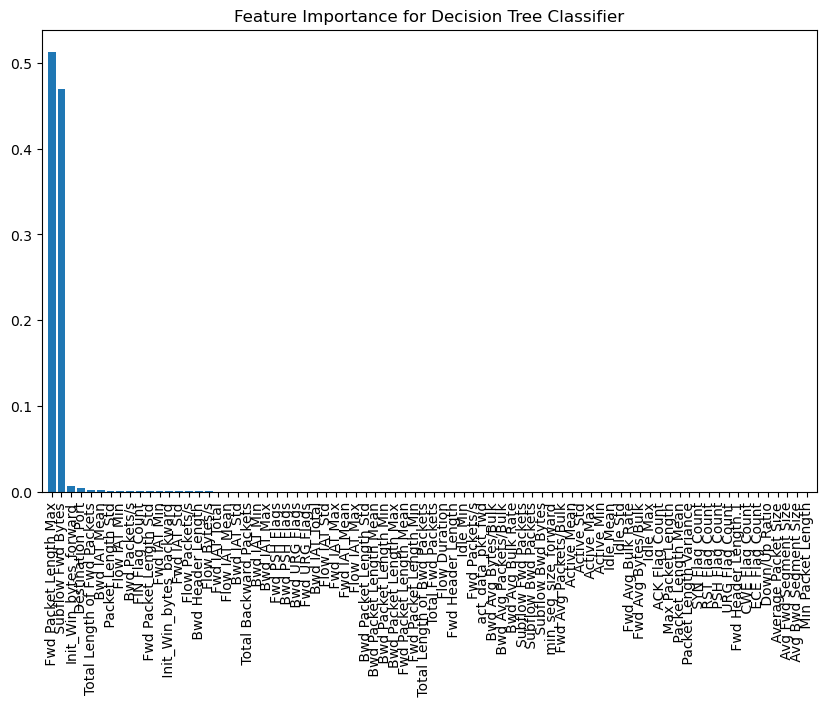

In [108]:
# Visualize feature importance for tree-based models
for model_name, model in models:
    if 'Decision Tree' in model_name or 'Random Forest' in model_name:
        importances = model.feature_importances_
        feature_names = X.columns
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance for {model_name}')
        plt.bar(range(X.shape[1]), importances[indices], align='center')
        plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
        plt.xlim([-1, X.shape[1]])
        plt.show()

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [110]:
# Function to split data into training and testing sets
def split_data(X, y, test_size=0.2, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Function to train a classification model
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)

# Function to evaluate a classification model
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    
    accuracy = accuracy_score(y, y_pred)
    confusion_matrix_result = confusion_matrix(y, y_pred)
    classification = classification_report(y, y_pred)
    f1 = f1_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    
    return {
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix_result,
        'classification_report': classification,
        'f1_score': f1,
        'precision': precision,
        'recall': recall
    }

In [111]:
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for {}'.format(model_name))
    plt.legend(loc='lower right')
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(precision, recall, auc, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(auc))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for {}'.format(model_name))
    plt.legend(loc='lower left')
    plt.show()

In [119]:
# Load your dataset, assuming you have a DataFrame 'data' and the target column is 'target'
# X = data.drop(columns=['target'])
# y = data['target']

# Split the data
# X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2, random_state=42)

# Create a list of classification models
models = [
    ('Naive Baye Classifier', BernoulliNB()),
    ('Decision Tree Classifier', DecisionTreeClassifier(criterion='entropy', random_state=0)),
    ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
    ('LogisticRegression', LogisticRegression(n_jobs=-1, random_state=0)),
    ('Random Forest Classifier', RandomForestClassifier(n_jobs=-1, random_state=0)),
]

# DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall'])



# Print results
print(results_df.head())

Empty DataFrame
Columns: [Model, Train Accuracy, Test Accuracy, F1 Score, Precision, Recall]
Index: []


C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kiran\AppData\Local\Temp\ipykernel_12028\3083140320.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)


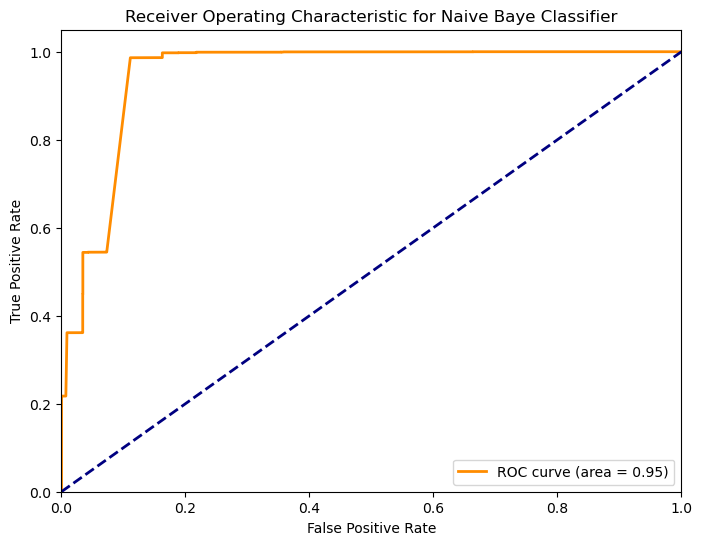

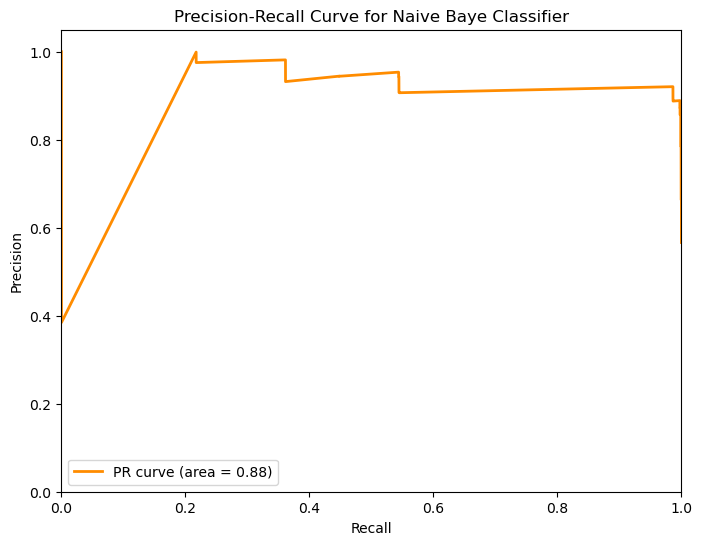

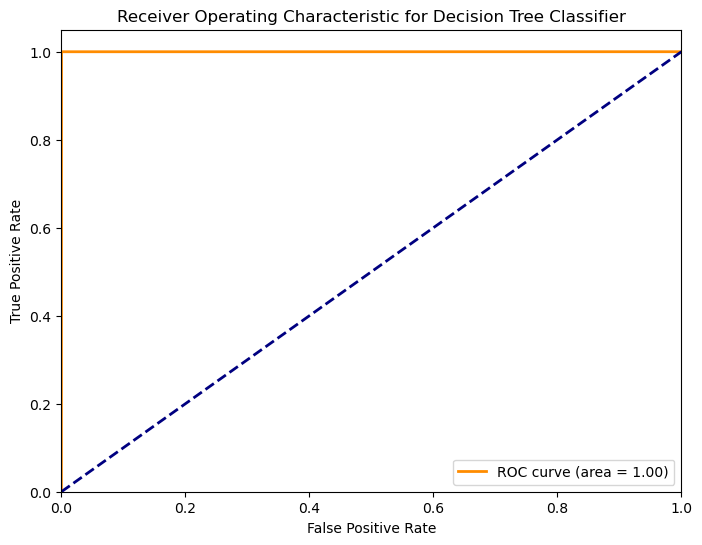

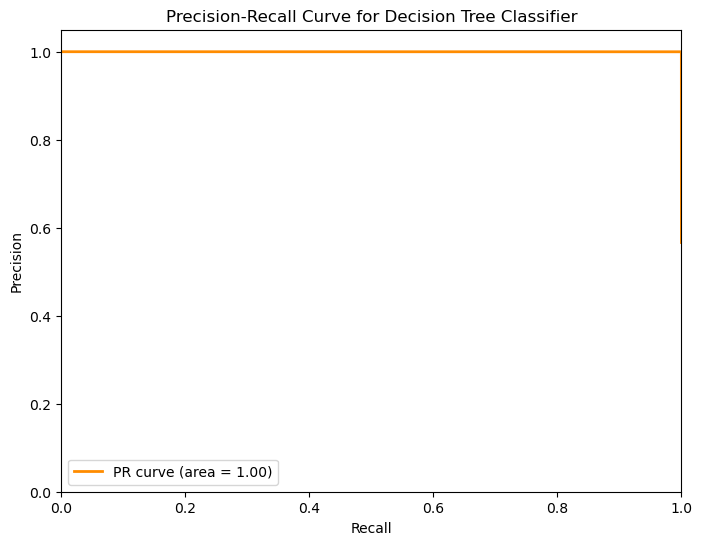

C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


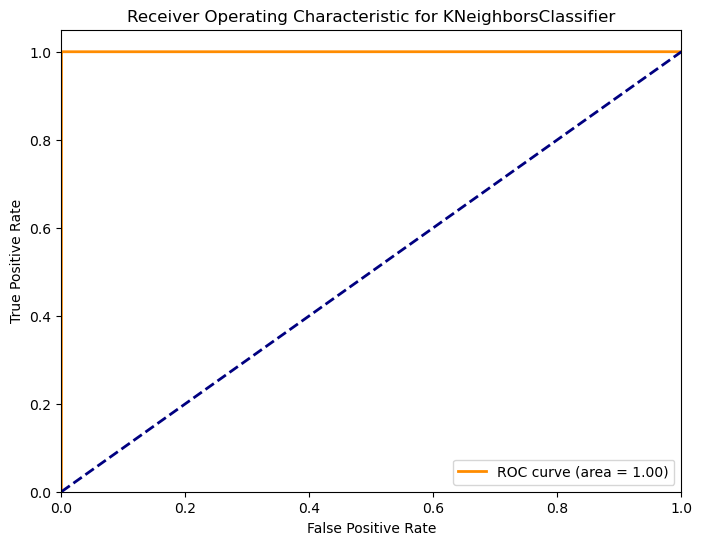

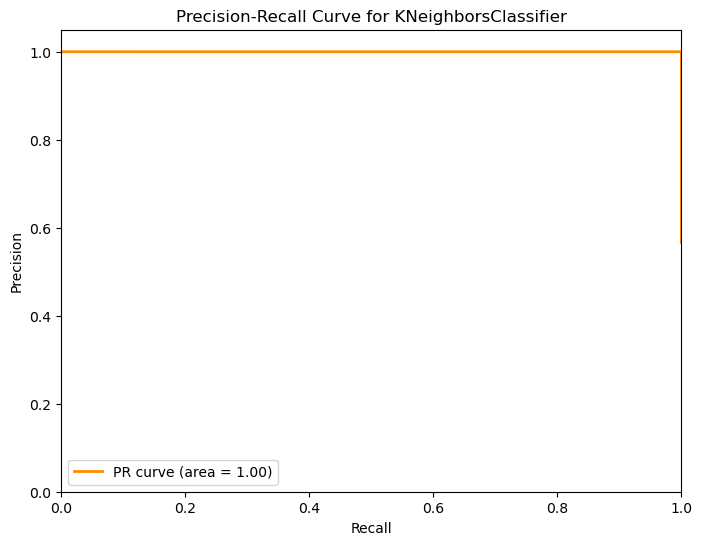

C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


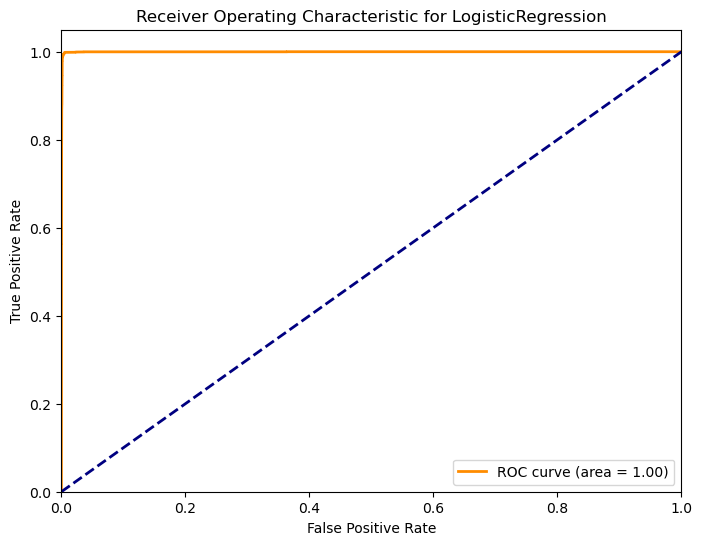

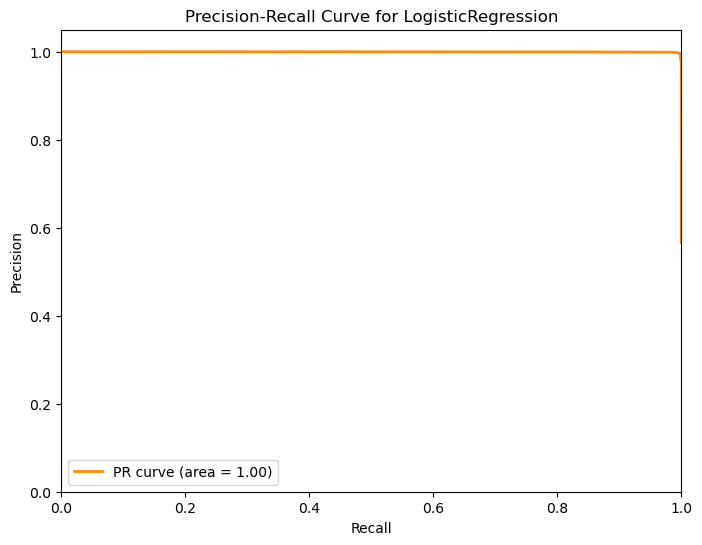

C:\Users\kiran\AppData\Local\Temp\ipykernel_12028\2510329330.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


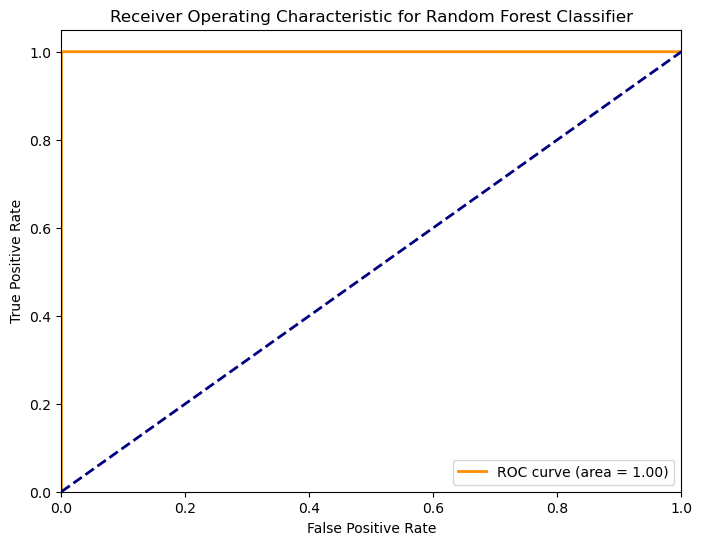

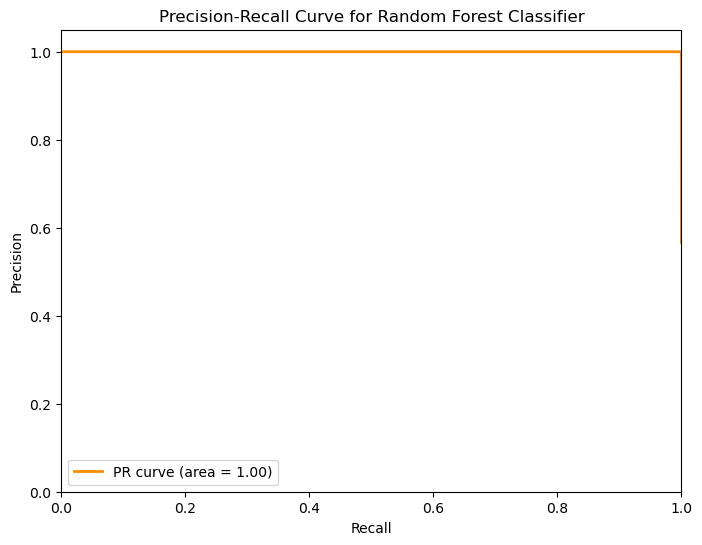

In [121]:
# Iterate through models
for model_name, model in models:
    train_model(model, X_train, y_train)
    train_evaluation = evaluate_model(model, X_train, y_train)
    test_evaluation = evaluate_model(model, X_test, y_test)
    
    new_row = {
        'Model': model_name,
        'Train Accuracy': train_evaluation['accuracy'],
        'Test Accuracy': test_evaluation['accuracy'],
        'F1 Score': test_evaluation['f1_score'],
        'Precision': test_evaluation['precision'],
        'Recall': test_evaluation['recall']
    }

    #  Store results in the DataFram
    results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)
    
    # results_df= {
    #    'Model': model_name,
    #    'Train Accuracy': train_evaluation['accuracy'],
    #    'Test Accuracy': test_evaluation['accuracy'],
    #    'F1 Score': test_evaluation['f1_score'],
    #    'Precision': test_evaluation['precision'],
    #    'Recall': test_evaluation['recall']}
    # Calculate ROC and Precision-Recall curves
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    
    # Plot ROC curve and Precision-Recall curve
    plot_roc_curve(fpr, tpr, roc_auc, model_name)
    plot_precision_recall_curve(precision, recall, pr_auc, model_name)


In [132]:
print(results_df.head())

                      Model  Train Accuracy  Test Accuracy  F1 Score  \
0     Naive Baye Classifier        0.923386       0.922011  0.934762   
1  Decision Tree Classifier        1.000000       0.999879  0.999893   
2      KNeighborsClassifier        0.999788       0.999745  0.999775   
3        LogisticRegression        0.988858       0.988924  0.990311   
4  Random Forest Classifier        1.000000       0.999919  0.999929   

   Precision    Recall  
0   0.888114  0.986582  
1   0.999858  0.999929  
2   0.999763  0.999787  
3   0.981332  0.999455  
4   1.000000  0.999858  


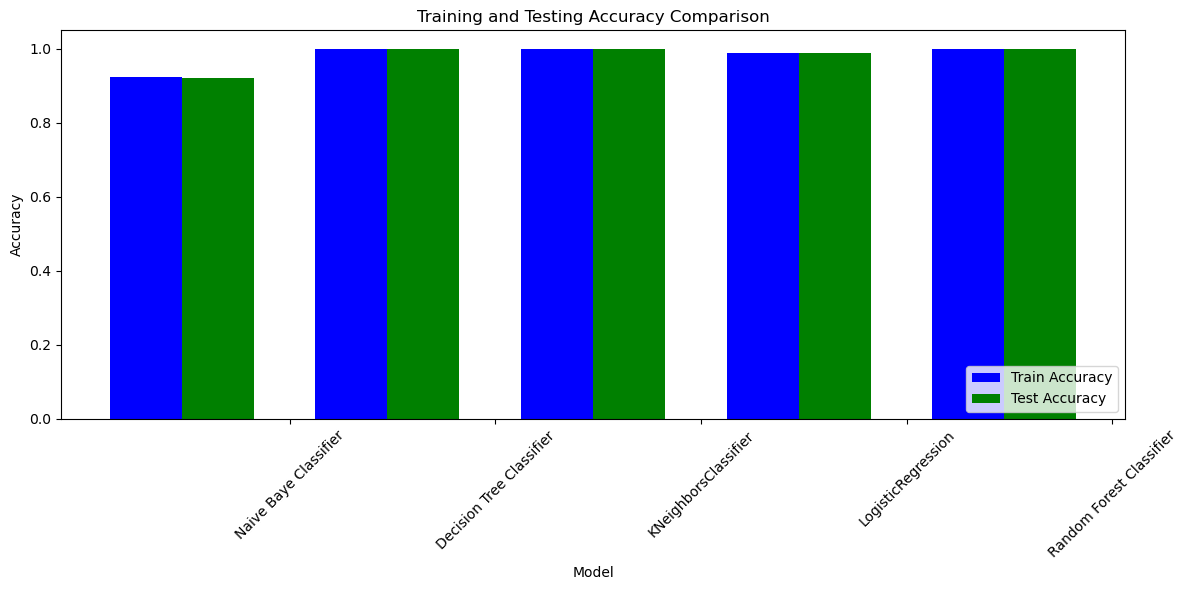

In [122]:
# ... (previous code remains the same)

# Create a grouped bar plot for comparing training and testing accuracy for each model
accuracy_metrics = ['Train Accuracy', 'Test Accuracy']
model_names = results_df['Model']
num_models = len(models)

# Set the width of each bar
bar_width = 0.35  # Adjusted the bar width to center the bars

# Generate an array of indices for the x-axis
indices = np.arange(len(model_names))  

# Create a color map for different accuracy metrics
colors = ['b', 'g']

plt.figure(figsize=(12, 6))

for i, metric in enumerate(accuracy_metrics):
    # Calculate the x-axis positions for each metric
    x_positions = [ind + i * bar_width for ind in indices]

    # Extract metric values for each model
    metric_values = results_df[metric]

    # Plot the grouped bars for each metric
    plt.bar(x_positions, metric_values, width=bar_width, label=metric, color=colors[i])

# Set x-axis labels, ticks, and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Comparison')
plt.xticks(indices + (bar_width * (num_models - 1)) / 2, model_names, rotation=45)
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()


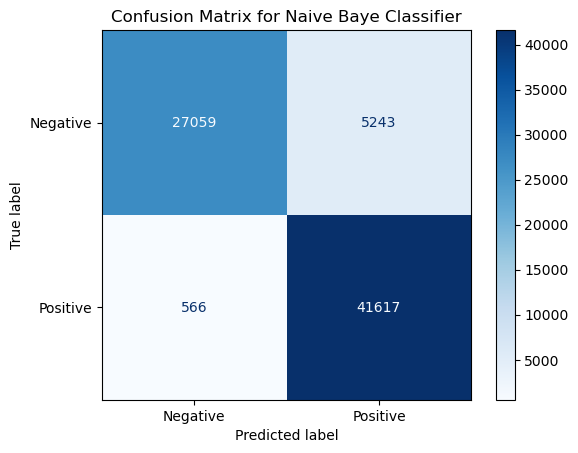

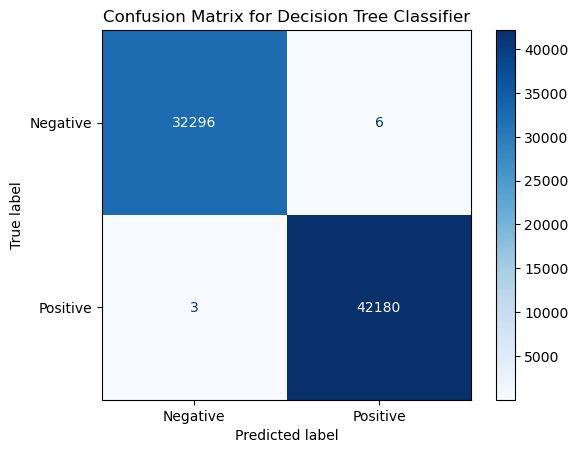

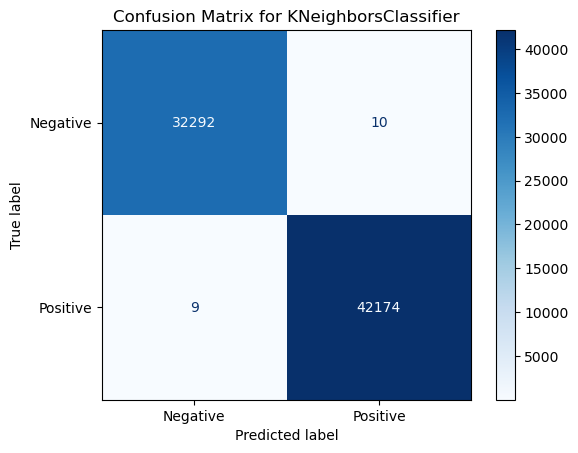

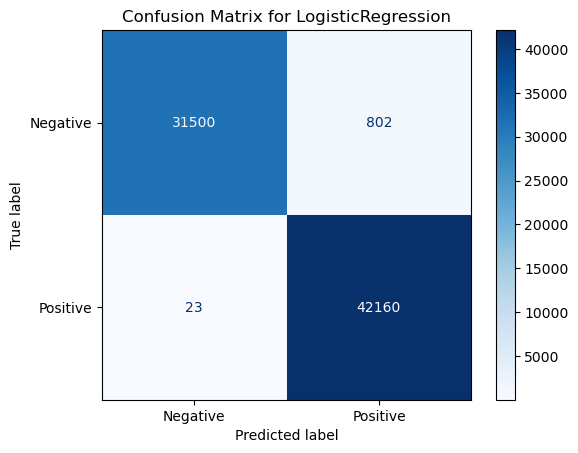

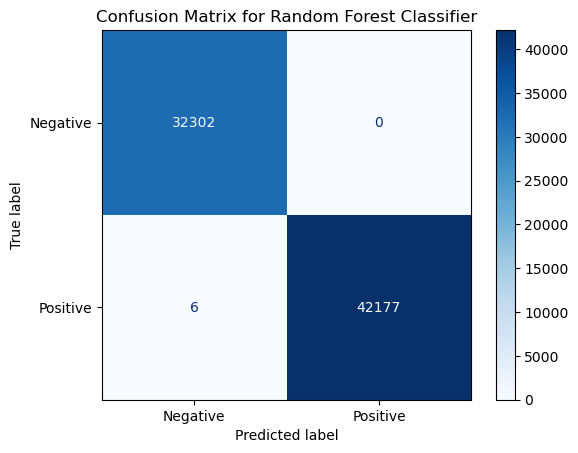

In [123]:
# Plot confusion matrix for each model
for model_name, model in models:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

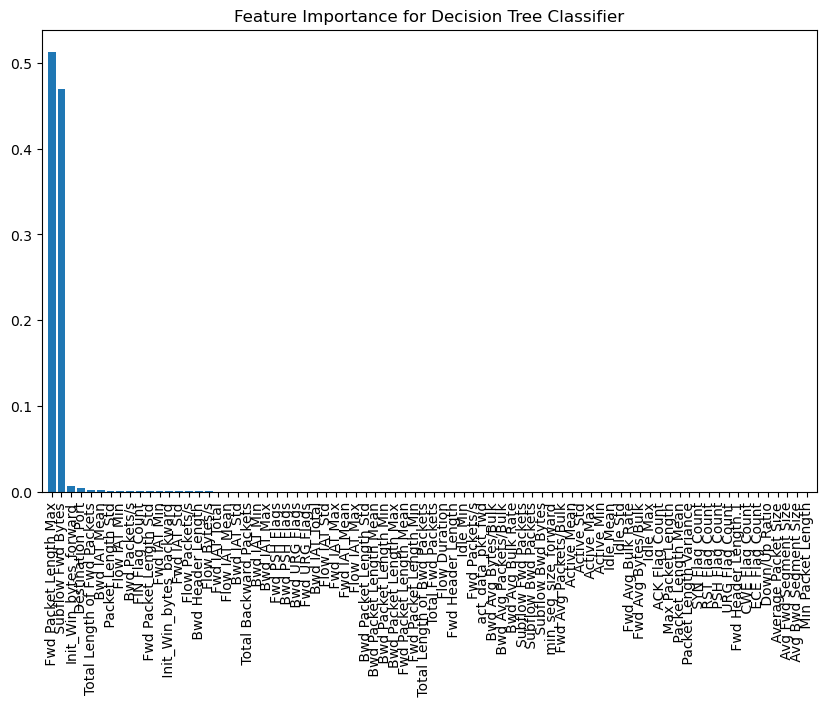

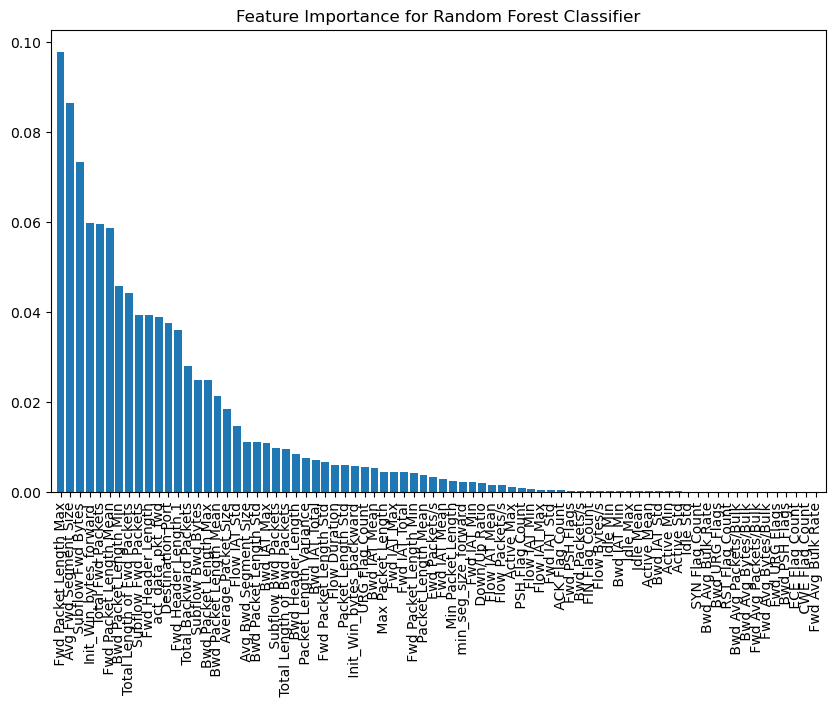

In [124]:
# Visualize feature importance for tree-based models
for model_name, model in models:
    if 'Decision Tree' in model_name or 'Random Forest' in model_name:
        importances = model.feature_importances_
        feature_names = X.columns
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance for {model_name}')
        plt.bar(range(X.shape[1]), importances[indices], align='center')
        plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
        plt.xlim([-1, X.shape[1]])
        plt.show()


C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

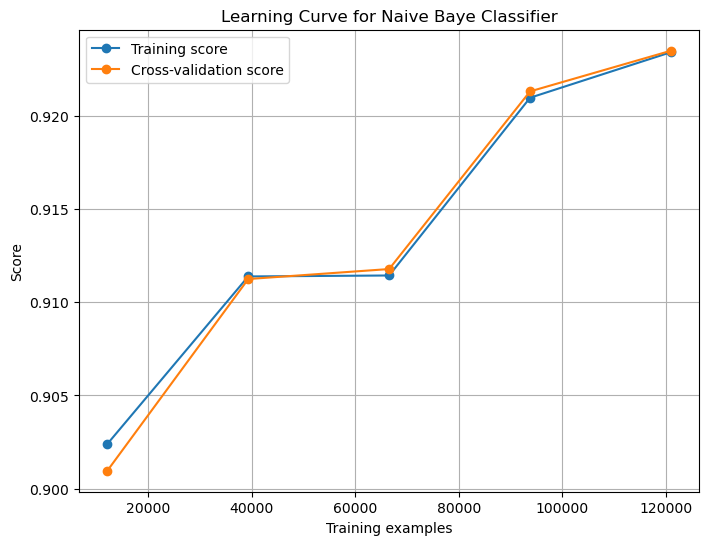

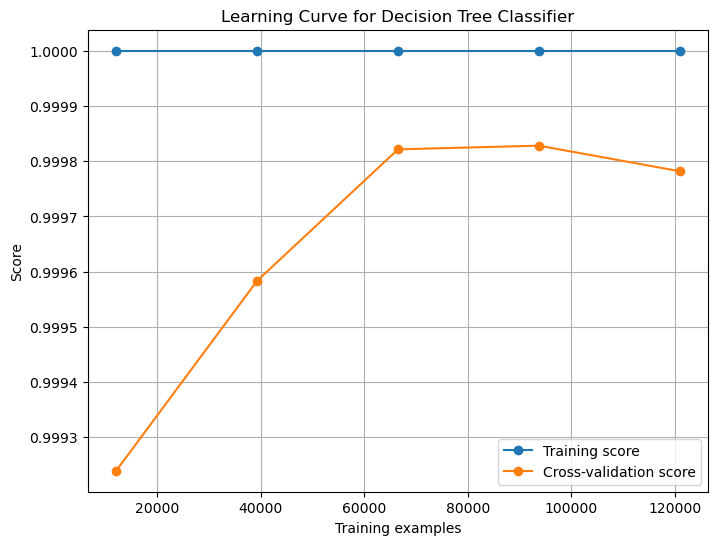

C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

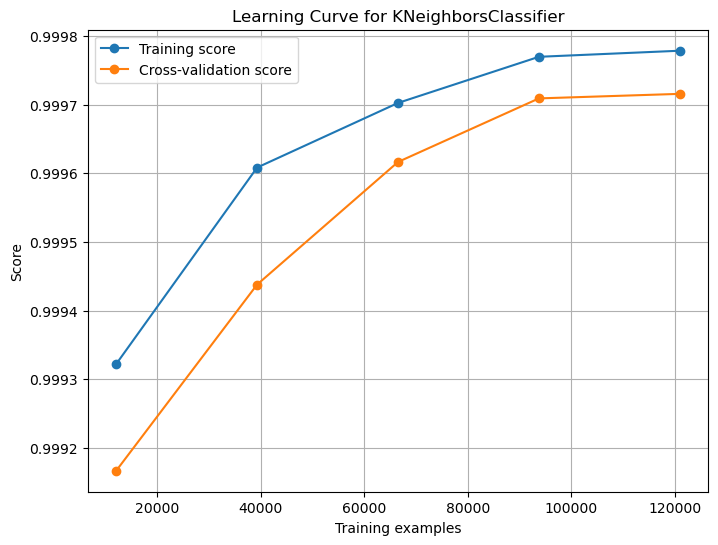

C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

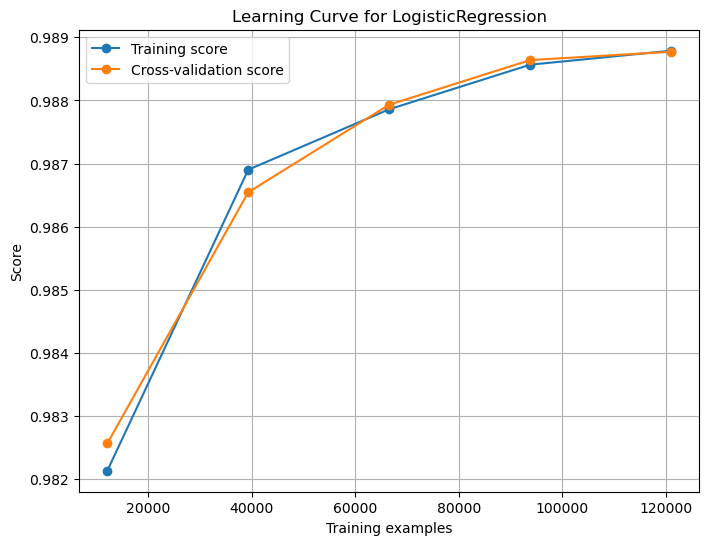

C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

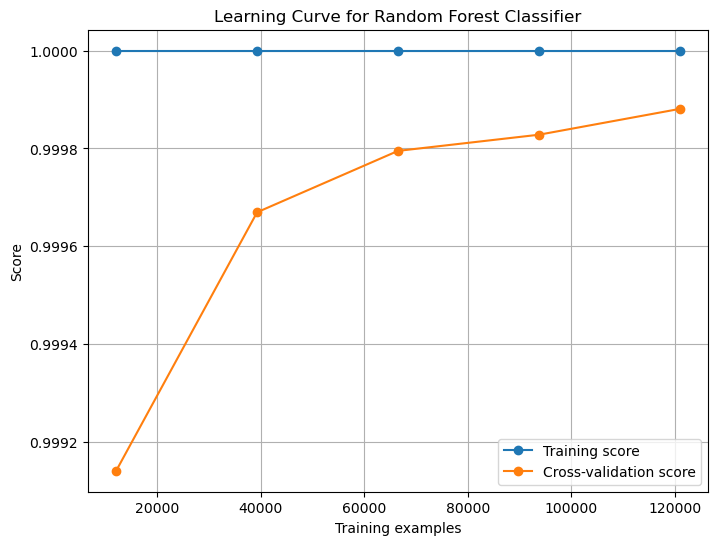

In [125]:
# Visualize learning curves for each model
from sklearn.model_selection import learning_curve

for model_name, model in models:
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
